<a href="https://colab.research.google.com/github/rashidali2305/Elevate-Labs/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
!pip install -q seaborn scikit-learn

In [3]:
# Basic imports used in this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# plotting settings
sns.set(style='whitegrid')
%matplotlib inline


In [4]:
# Option A: quick demo dataset (no downloads)
df = sns.load_dataset('titanic')
df.shape, df.head(3)


((891, 15),
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 1         1       1  female  38.0      1      0  71.2833        C  First   
 2         1       3  female  26.0      0      0   7.9250        S  Third   
 
      who  adult_male deck  embark_town alive  alone  
 0    man        True  NaN  Southampton    no  False  
 1  woman       False    C    Cherbourg   yes  False  
 2  woman       False  NaN  Southampton   yes   True  )

Rows, cols: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Nulls per column:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('freq').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('mean').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['unique'].value_counts()
    for x_label, grp in _df_4.groupby('count')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('count')
_ = plt.ylabel('unique')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['freq'].value_counts()
    for x_label, grp in _df_5.groupby('unique')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('unique')
_ = plt.ylabel('freq')

ValueError: zero-size array to reduction operation fmin which has no identity

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['mean'].value_counts()
    for x_label, grp in _df_6.groupby('freq')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('freq')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['std'].value_counts()
    for x_label, grp in _df_7.groupby('mean')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('mean')
_ = plt.ylabel('std')

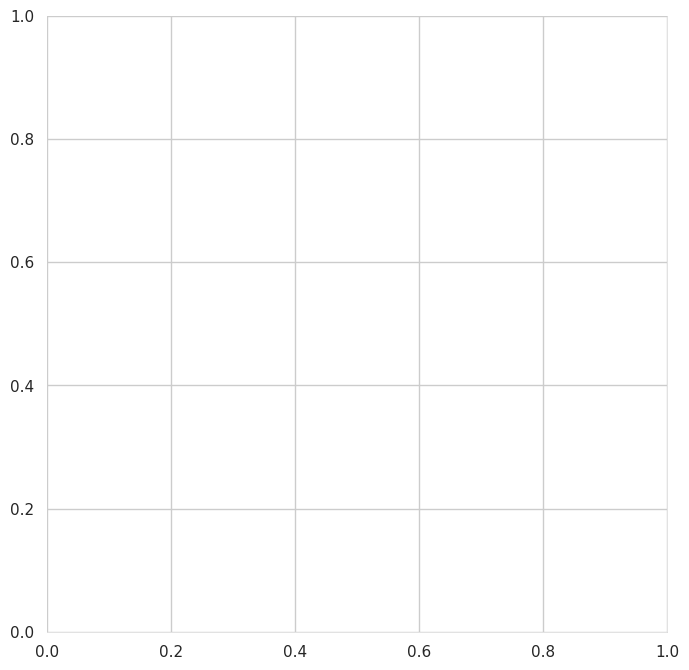

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
# Basic inspection
print("Rows, cols:", df.shape)
display(df.head())
display(df.info())           # data types and non-null counts
display(df.describe(include='all').T)  # summary stats (numeric + object)
print("\nNulls per column:")
display(df.isnull().sum())


In [6]:
print(df_2dhist.shape)
print(df_2dhist.head())

NameError: name 'df_2dhist' is not defined

In [7]:
print(_df_6.shape)
print(_df_6.head())
print(_df_6.columns)



(15, 11)
          count unique   top freq       mean        std   min     25%   50%  \
survived  891.0    NaN   NaN  NaN   0.383838   0.486592   0.0     0.0   0.0   
pclass    891.0    NaN   NaN  NaN   2.308642   0.836071   1.0     2.0   3.0   
sex         891      2  male  577        NaN        NaN   NaN     NaN   NaN   
age       714.0    NaN   NaN  NaN  29.699118  14.526497  0.42  20.125  28.0   
sibsp     891.0    NaN   NaN  NaN   0.523008   1.102743   0.0     0.0   0.0   

           75%   max  
survived   1.0   1.0  
pclass     3.0   3.0  
sex        NaN   NaN  
age       38.0  80.0  
sibsp      1.0   8.0  
Index(['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max'],
      dtype='object')


In [8]:
df_2dhist = _df_6.pivot_table(
    index='mean',
    columns='freq',
    aggfunc='size',
    fill_value=0
)

print(df_2dhist.shape)
print(df_2dhist.head())


(0, 0)
Empty DataFrame
Columns: []
Index: []


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('freq')
plt.ylabel('mean')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x800 with 0 Axes>

In [10]:
print(df_2dhist.shape)
print(df_2dhist.head())
print(df_2dhist.isnull().sum().sum(), "total NaN values")


(0, 0)
Empty DataFrame
Columns: []
Index: []
0.0 total NaN values


In [11]:

print(_df_6.columns)


df_temp = _df_6.dropna(subset=['freq', 'mean'])

df_2dhist = pd.crosstab(df_temp['mean'], df_temp['freq'])

print(df_2dhist.shape)
print(df_2dhist.head())


Index(['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max'],
      dtype='object')
(0, 0)
Empty DataFrame
Columns: []
Index: []


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

if not df_2dhist.empty:
    plt.figure(figsize=(8, 8))
    sns.heatmap(df_2dhist, cmap='viridis')
    plt.xlabel('freq')
    plt.ylabel('mean')
    plt.show()
else:
    print("⚠️ df_2dhist is empty — no data to plot.")


⚠️ df_2dhist is empty — no data to plot.


In [13]:
# See how many nulls in each column
df.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [14]:
from sklearn.impute import SimpleImputer
import pandas as pd


num_cols = df.select_dtypes(include=['int64','float64']).columns


mean_imputer = SimpleImputer(strategy='mean')


df_mean = df.copy()
df_mean[num_cols] = mean_imputer.fit_transform(df_mean[num_cols])

print("Missing values after mean imputation:")
print(df_mean.isnull().sum())


Missing values after mean imputation:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [15]:

median_imputer = SimpleImputer(strategy='median')


df_median = df.copy()
df_median[num_cols] = median_imputer.fit_transform(df_median[num_cols])

print("Missing values after median imputation:")
print(df_median.isnull().sum())


Missing values after median imputation:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [16]:

cat_cols = df.select_dtypes(include=['object','category','bool']).columns


mode_imputer = SimpleImputer(strategy='most_frequent')


df_mode = df.copy()
df_mode[cat_cols] = mode_imputer.fit_transform(df_mode[cat_cols])

print("Missing values after mode imputation:")
print(df_mode.isnull().sum())


Missing values after mode imputation:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck             0
embark_town      0
alive            0
alone            0
dtype: int64


In [17]:
df_cleaned = df.copy()


df_cleaned[num_cols] = median_imputer.fit_transform(df_cleaned[num_cols])


df_cleaned[cat_cols] = mode_imputer.fit_transform(df_cleaned[cat_cols])

print("Final missing values after combined imputation:")
print(df_cleaned.isnull().sum())


Final missing values after combined imputation:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [18]:
cat_cols = df.select_dtypes(include=['object','category']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


In [19]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()
le = LabelEncoder()

for col in cat_cols:
    df_label[col] = le.fit_transform(df_label[col])

df_label.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True


from matplotlib import pyplot as plt
_df_8['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('adult_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('alone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='survived', y='pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='pclass', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='sex', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='age', y='sibsp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('adult_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='adult_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alone')):
  _plot_series(series, series_name, i)
  fig.legend(title='alone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('adult_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='adult_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alone')):
  _plot_series(series, series_name, i)
  fig.legend(title='alone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('pclass')

from matplotlib import pyplot as plt
_df_22['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['alone'].value_counts()
    for x_label, grp in _df_26.groupby('adult_male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('adult_male')
_ = plt.ylabel('alone')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['adult_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='survived', y='adult_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['alone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='survived', y='alone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['adult_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='pclass', y='adult_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['alone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='pclass', y='alone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
print("Before encoding:", df.shape)
print("After encoding:", df_onehot.shape)


Before encoding: (891, 15)
After encoding: (891, 24)


In [21]:
df_onehot = pd.get_dummies(df, columns=df.select_dtypes(include=['object','category']).columns, drop_first=True)

In [23]:
df_onehot.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,False,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False


from matplotlib import pyplot as plt
_df_31['survived'].plot(kind='hist', bins=20, title='survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['sibsp'].plot(kind='hist', bins=20, title='sibsp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('adult_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_36.groupby('alone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_37.groupby('sex_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_38.groupby('embarked_S').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='survived', y='pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='pclass', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='age', y='sibsp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='sibsp', y='fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('adult_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='adult_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('alone')):
  _plot_series(series, series_name, i)
  fig.legend(title='alone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex_male')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex_male', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['parch']
  ys = series['survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_46.sort_values('parch', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('embarked_S')):
  _plot_series(series, series_name, i)
  fig.legend(title='embarked_S', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('parch')
_ = plt.ylabel('survived')

from matplotlib import pyplot as plt
_df_47['survived'].plot(kind='line', figsize=(8, 4), title='survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['sibsp'].plot(kind='line', figsize=(8, 4), title='sibsp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['alone'].value_counts()
    for x_label, grp in _df_51.groupby('adult_male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('adult_male')
_ = plt.ylabel('alone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sex_male'].value_counts()
    for x_label, grp in _df_52.groupby('alone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('alone')
_ = plt.ylabel('sex_male')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['embarked_S'].value_counts()
    for x_label, grp in _df_53.groupby('sex_male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex_male')
_ = plt.ylabel('embarked_S')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['class_Third'].value_counts()
    for x_label, grp in _df_54.groupby('embarked_S')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('embarked_S')
_ = plt.ylabel('class_Third')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['adult_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='survived', y='adult_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['alone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='survived', y='alone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_57['sex_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_57, x='survived', y='sex_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_58['embarked_S'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_58, x='survived', y='embarked_S', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
num_cols = df_onehot.select_dtypes(include=['int64','float64']).columns
print("Numeric columns:", num_cols.tolist())


Numeric columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


cols_to_scale = ['age', 'fare', 'sibsp', 'parch', 'pclass']

df_standardized = df_onehot.copy()
df_standardized[cols_to_scale] = scaler.fit_transform(df_standardized[cols_to_scale])

df_standardized[cols_to_scale].head()


,age,fare,sibsp,parch,pclass
0,-0.530377,-0.502445,0.432793,-0.473674,0.827377
1,0.571831,0.786845,0.432793,-0.473674,-1.566107
2,-0.254825,-0.488854,-0.474545,-0.473674,0.827377
3,0.365167,0.420730,0.432793,-0.473674,-1.566107
4,0.365167,-0.486337,-0.474545,-0.473674,0.827377


In [26]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

df_normalized = df_onehot.copy()
df_normalized[cols_to_scale] = minmax.fit_transform(df_normalized[cols_to_scale])

df_normalized[cols_to_scale].head()


,age,fare,sibsp,parch,pclass
0,0.271174,0.014151,0.125,0.0,1.0
1,0.472229,0.139136,0.125,0.0,0.0
2,0.321438,0.015469,0.000,0.0,1.0
3,0.434531,0.103644,0.125,0.0,0.0
4,0.434531,0.015713,0.000,0.0,1.0


In [27]:
print("Original ranges:")
print(df_onehot[cols_to_scale].describe())

print("\nAfter Standardization:")
print(df_standardized[cols_to_scale].describe())

print("\nAfter Normalization:")
print(df_normalized[cols_to_scale].describe())


Original ranges:
              age        fare       sibsp       parch      pclass
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594    2.308642
std     14.526497   49.693429    1.102743    0.806057    0.836071
min      0.420000    0.000000    0.000000    0.000000    1.000000
25%     20.125000    7.910400    0.000000    0.000000    2.000000
50%     28.000000   14.454200    0.000000    0.000000    3.000000
75%     38.000000   31.000000    1.000000    0.000000    3.000000
max     80.000000  512.329200    8.000000    6.000000    3.000000

After Standardization:
                age          fare         sibsp         parch        pclass
count  7.140000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.388379e-16  3.987333e-18  4.386066e-17  5.382900e-17 -8.772133e-17
std    1.000701e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.016979e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01

In [28]:

print("Here's a peek at our data:")
print(df.head())

Here's a peek at our data:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Let's draw pictures to find the odd ones out!


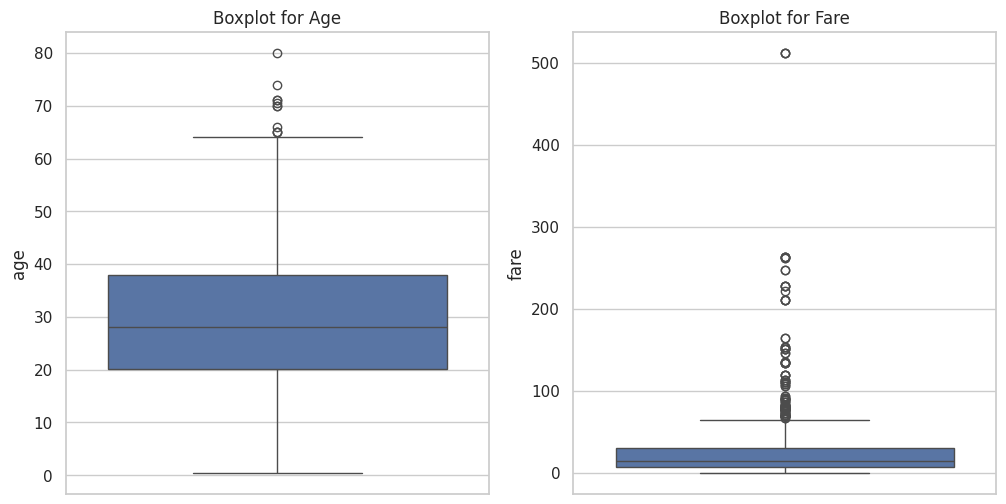

In [29]:
print("Let's draw pictures to find the odd ones out!")

# Create a figure to hold our plots
plt.figure(figsize=(12, 6))

# Plot for Age
plt.subplot(1, 2, 1) # This means 1 row, 2 columns, and we're on the 1st plot
sns.boxplot(y=df['age'])
plt.title('Boxplot for Age')

# Plot for Fare
plt.subplot(1, 2, 2) # This means 1 row, 2 columns, and we're on the 2nd plot
sns.boxplot(y=df['fare'])
plt.title('Boxplot for Fare')

# Show the plots
plt.show()

In [30]:

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)


IQR = Q3 - Q1

!
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"Anything below ${lower_bound:.2f} or above ${upper_bound:.2f} is an outlier.")
print("-" * 30)


print(f"Original number of passengers: {df.shape[0]}")

df_no_outliers = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]


print(f"Number of passengers after removing outliers: {df_no_outliers.shape[0]}")

Anything below $-26.72 or above $65.63 is an outlier.
------------------------------
Original number of passengers: 891
Number of passengers after removing outliers: 775


Let's draw a new boxplot with our clean data!


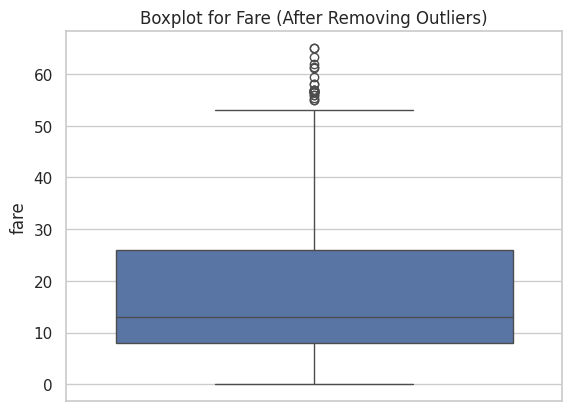

In [31]:
print("Let's draw a new boxplot with our clean data!")

# Create a new boxplot for the 'fare' column from our clean data
sns.boxplot(y=df_no_outliers['fare'])
plt.title('Boxplot for Fare (After Removing Outliers)')

# Show the plot
plt.show()